1. Bài 1:
* Đếm số chuyến bay trễ của các sân bay (cột ‘origin’)
* Tương tự, đếm số chuyến bay không trễ của các sân bay
* Tạo bảng hiển thị số chuyến bay trễ vs. không trễ
* Vẽ lên biểu đồ
2. Bài 2:
* Thực hiện tương tự với các hãng hàng không (cột ‘carrier’)
3. Bài 3:
* Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình của các hãng
* Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình từ các sân bay
* Vẽ các kết quả lên biểu đồ
4. Bài 4:
* Tính tổng, trung bình, mean, median của quãng đường bay của từng hãng (cột distance)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/nycflights.csv', 
                low_memory=False,
                index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


In [3]:
df.isna().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
dtype: int64

In [4]:
df['dep_time'].fillna(df['dep_time'].mean(), inplace=True)
df['dep_delay'].fillna(df['dep_delay'].mean(), inplace=True)
df['arr_time'].fillna(df['arr_time'].mean(), inplace=True)
df['arr_delay'].fillna(df['arr_delay'].mean(), inplace=True)
df['tailnum'].fillna('Unknown', inplace=True)
df['air_time'].fillna(df['air_time'].mean(), inplace=True)
df['hour'].fillna(df['hour'].mean(), inplace=True)
df['minute'].fillna(df['minute'].mean(), inplace=True)

## Bài 1

In [54]:
# number of delayed flights per origin
# delayed flights if arr_delay >= 15 minutes
# no delayed flights if arr_delay < 15 minutes

delayed_flights_origin = df[df['arr_delay']>=15].groupby(df['origin']).size().to_frame(name='Delayed flights')
no_delayed_flights_origin = df[df['arr_delay']<15].groupby(df['origin']).size().to_frame(name='No delayed flights')

In [56]:
df_flights_origin = pd.concat((delayed_flights_origin, no_delayed_flights_origin), 
                               axis=1)
df_flights_origin

,Delayed flights,No delayed flights
origin,,
EWR,30847,89988
JFK,25849,85430
LGA,23404,81258


<function matplotlib.pyplot.show(close=None, block=None)>

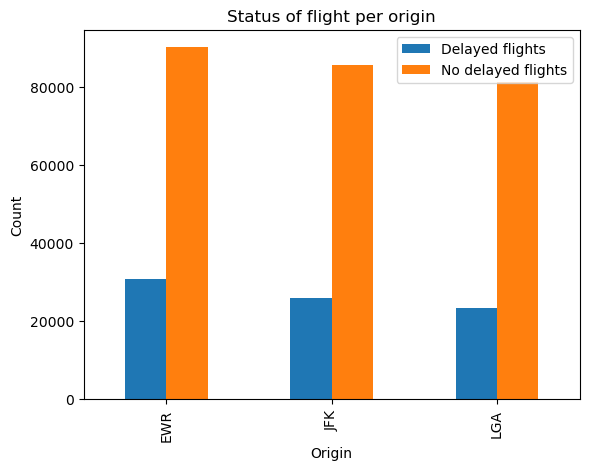

In [57]:
ax = df_flights_origin.plot(kind='bar', stacked=False)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Status of flight per origin')
plt.show

## Bài 2

In [58]:
delayed_flights_carrier = df[df['arr_delay']>=15].groupby(df['carrier']).size().to_frame(name='Delayed flights')
no_delayed_flights_carrier = df[df['arr_delay']<15].groupby(df['carrier']).size().to_frame(name='No delayed flights')

In [59]:
df_flight_carrier = pd.concat((delayed_flights_carrier, no_delayed_flights_carrier), axis=1)
df_flight_carrier

,Delayed flights,No delayed flights
carrier,,
9E,4422,14038
AA,6203,26526
AS,104,610
B6,14567,40068
DL,9038,39072
EV,16399,37774
F9,264,421
FL,1100,2160
HA,44,298


<function matplotlib.pyplot.show(close=None, block=None)>

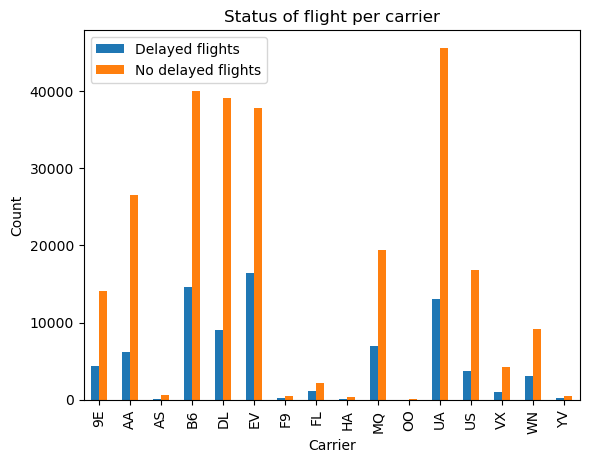

In [63]:
ax = df_flight_carrier.plot(kind='bar', stacked=False)
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Status of flight per carrier')
plt.show

## Bài 3

In [62]:
mean_arr_delay_origin = df['arr_delay'].groupby(df['origin']).mean().round(2).to_frame(name='mean of arr_delay')
mean_dep_delay_origin = df['dep_delay'].groupby(df['origin']).mean().round(2).to_frame(name='mean of dep_delay')

In [61]:
df_mean_delay_origin = pd.concat((mean_arr_delay_origin, mean_dep_delay_origin), axis=1)
df_mean_delay_origin

,mean of arr_delay,mean of dep_delay
origin,,
EWR,9.04,15.04
JFK,5.58,12.12
LGA,5.82,10.42


<function matplotlib.pyplot.show(close=None, block=None)>

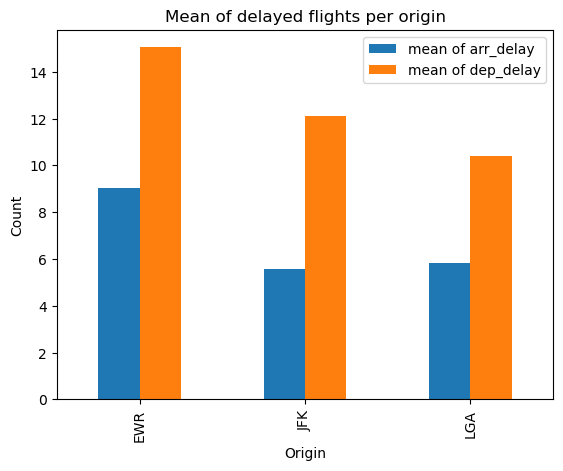

In [64]:
ax = df_mean_delay_origin.plot(kind='bar', stacked=False)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Mean of delayed flights per origin')
plt.show

In [65]:
mean_arr_delay_carrier = df['arr_delay'].groupby(df['carrier']).mean().round(2).to_frame(name='mean of arr_delay')
mean_dep_delay_carrier = df['dep_delay'].groupby(df['carrier']).mean().round(2).to_frame(name='mean of dep_delay')

In [66]:
df_mean_delay_carrier = pd.concat((mean_arr_delay_carrier, mean_dep_delay_carrier), axis=1)
df_mean_delay_carrier

,mean of arr_delay,mean of dep_delay
carrier,,
9E,7.35,16.49
AA,0.52,8.66
AS,-9.81,5.82
B6,9.43,13.02
DL,1.69,9.29
EV,15.29,19.57
F9,21.83,20.18
FL,19.77,18.59
HA,-6.92,4.90


<function matplotlib.pyplot.show(close=None, block=None)>

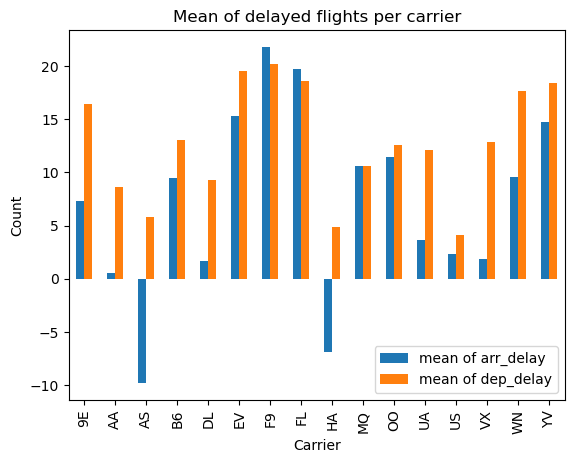

In [68]:
ax = df_mean_delay_carrier.plot(kind='bar', stacked=False)
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Mean of delayed flights per carrier')
plt.show

## Bài 4

In [69]:
sum_distance_carrier = df['distance'].groupby(df['carrier']).sum().to_frame(name='Sum')
mean_distance_carrier = df['distance'].groupby(df['carrier']).mean().round(2).to_frame(name='Mean')
median_distance_carrier = df['distance'].groupby(df['carrier']).median().round(2).to_frame(name='Median')

In [70]:
df_distance_carrier = pd.concat((sum_distance_carrier, mean_distance_carrier, median_distance_carrier), axis=1)
df_distance_carrier

,Sum,Mean,Median
carrier,,,
9E,9788152,530.24,509.0
AA,43864584,1340.24,1096.0
AS,1715028,2402.00,2402.0
B6,58384137,1068.62,1023.0
DL,59507317,1236.90,1020.0
EV,30498951,562.99,533.0
F9,1109700,1620.00,1620.0
FL,2167344,664.83,762.0
HA,1704186,4983.00,4983.0
